# **Step2_AI 강사 Agent v2.0**

## **0. 미션**

### **미션③ : 모듈 고도화1**
다음 항목에 대해서 조 상황에 맞게 선택적으로 고도화 합니다.

* 입력 프롬프트 추가 : 강의 목소리, 톤 조절, 강의 스타일 지침
* 정보 분해 : 여러 슬라이드를 저장하고 관리하기 위한 폴더 준비, 불필요한 정보 제거, 제목 추출
* 페이지별 내용 생성 : 슬라이드 내 정보 뿐만 아니라 부연 설명을 위한 검색 기능 추가
* 강의 스크립트 생성 : 전체 강의 내용을 참조하여 강의 흐름을 구상하고,
                                   현재 페이지 강의 스크립트 작성
* 내용 검토 : 페이지 내용과 강의 스크립트 비교, 강의 스크립트 흐름 적절한지 검토




### **미션④ : AI 강사 Agent 완성**
* 모듈 고도화2(다음 항목에 대해서 조 상황에 맞게 선택적으로 고도화 합니다.)
    * 음성 변환 : 강의 목소리, 톤 조절 음성 변환
    * 영상 제작 :
        * 각 페이지 : 음성과 슬라이드 스냅샷 이미지 합성하여 영상 제작하기
        * 전체 강의 영상 : 각 슬라이드 강의를 전체 슬라이드 강의 영상으로 합치기
* 웹 화면 연결(gradio)
    * 음성 변환 : 강의 목소리, 톤 조절 프롬프트 기반 음성 변환
* 전체 Agent 그래프 구축
    * 전체를 Agent 그래프로 엮기


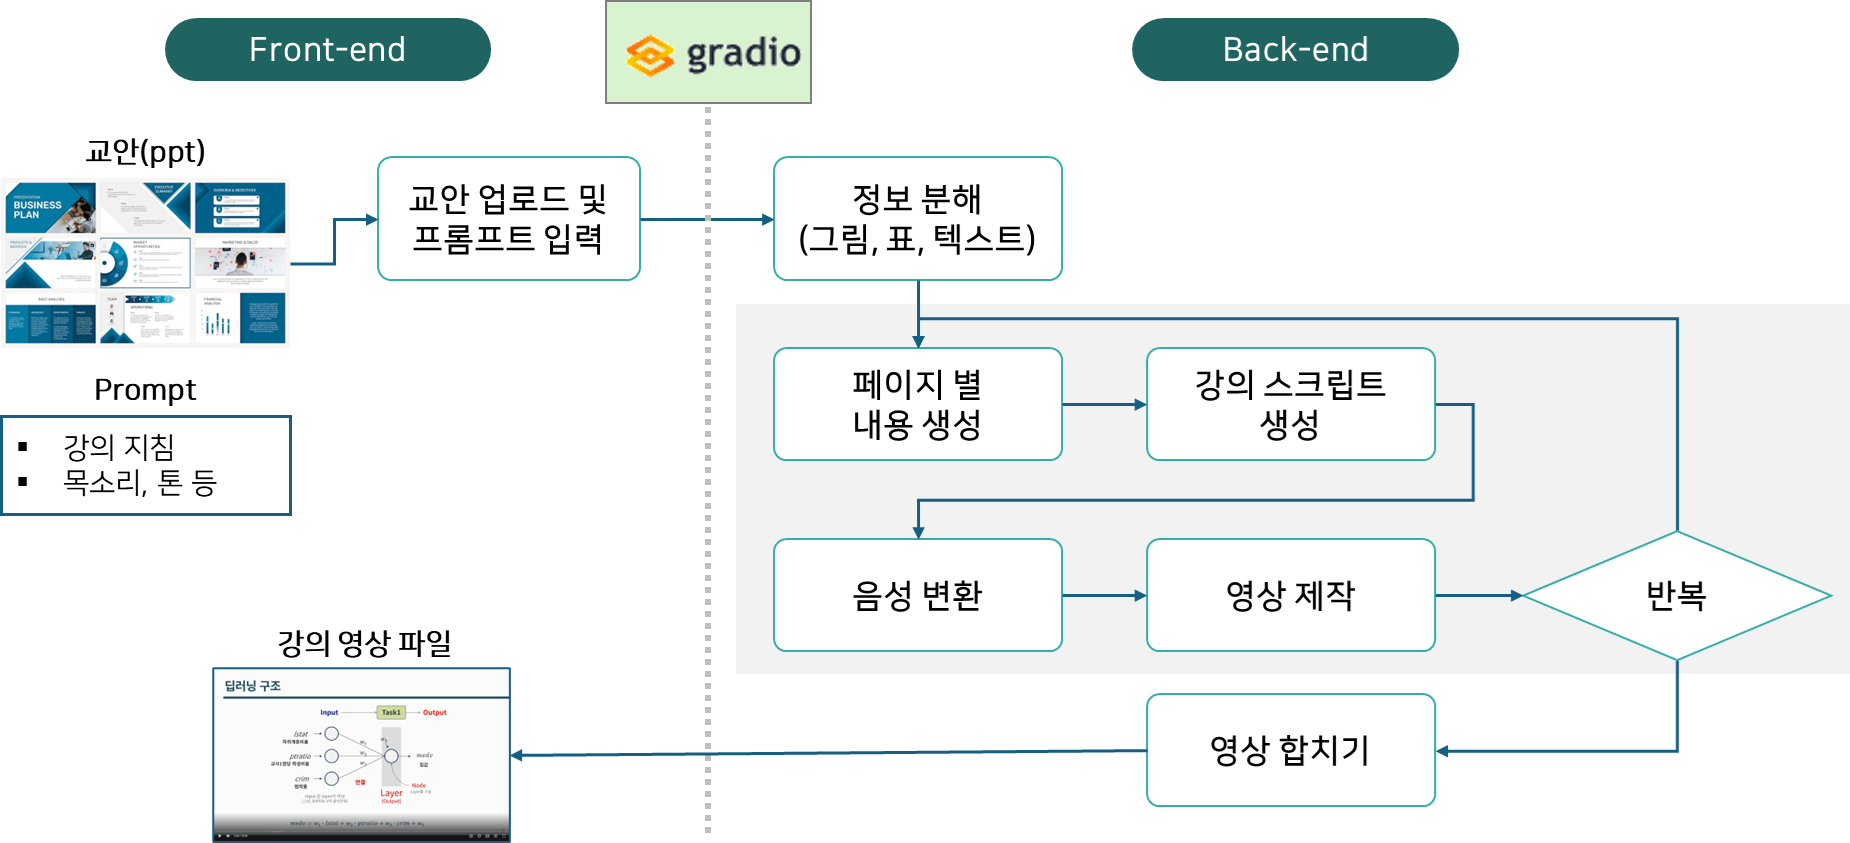

## **1. 환경준비**

### (1) 구글 드라이브

* 구글 드라이브 폴더 생성
    * 새 폴더(project_multi_modal)를 생성하고
    * 제공 받은 파일을 업로드

* 구글 드라이브 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install --upgrade gradio fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: fastapi
    Found existing installation: fastapi 0.121.0
    Uninstalling fastapi-0.121.0:
      Successfully uninstalled fastapi-0.121.0


### (2) 한글 폰트 준비
* 한글 폰트 설치 및 설정 코드
* 영상 제작 등 한글 사용시 필요

In [ ]:
# !apt-get -y install ffmpeg libreoffice poppler-utils poppler-data locales \
#                    fonts-noto-cjk fonts-noto-cjk-extra fonts-nanum fonts-unfonts-core
# !sed -i 's/^# *ko_KR.UTF-8 UTF-8/ko_KR.UTF-8 UTF-8/' /etc/locale.gen
# !locale-gen ko_KR.UTF-8
# !update-locale LANG=ko_KR.UTF-8
# !fc-cache -fv

In [ ]:
# %%bash
# mkdir -p ~/.config/fontconfig
# cat > ~/.config/fontconfig/fonts.conf <<'EOF'
# <?xml version="1.0"?>
# <!DOCTYPE fontconfig SYSTEM "fonts.dtd">
# <fontconfig>

#   <!-- ▷ 한국어 텍스트엔 Noto Sans CJK KR을 우선 사용 -->
#   <match target="pattern">
#     <test name="lang" compare="eq"><string>ko</string></test>
#     <edit name="family" mode="prepend" binding="strong">
#       <string>Noto Sans CJK KR</string>
#     </edit>
#   </match>

#   <!-- ▷ 일반 가족명에도 기본 대체 추가 -->
#   <alias><family>sans-serif</family><prefer><family>Noto Sans CJK KR</family></prefer></alias>
#   <alias><family>serif</family><prefer><family>Noto Serif CJK KR</family></prefer></alias>
#   <alias><family>monospace</family><prefer><family>Noto Sans Mono CJK KR</family></prefer></alias>

#   <!-- ▷ Windows/macOS/웹에서 흔한 한글 폰트들을 Noto로 매핑 -->
#   <alias><family>Malgun Gothic</family>        <prefer><family>Noto Sans CJK KR</family></prefer></alias>
#   <alias><family>맑은 고딕</family>             <prefer><family>Noto Sans CJK KR</family></prefer></alias>
#   <alias><family>Apple SD Gothic Neo</family>  <prefer><family>Noto Sans CJK KR</family></prefer></alias>
#   <alias><family>AppleGothic</family>          <prefer><family>Noto Sans CJK KR</family></prefer></alias>
#   <alias><family>Pretendard</family>           <prefer><family>Noto Sans CJK KR</family></prefer></alias>
#   <alias><family>Pretendard Variable</family>  <prefer><family>Noto Sans CJK KR</family></prefer></alias>
#   <alias><family>NanumSquare</family>          <prefer><family>Noto Sans CJK KR</family></prefer></alias>
#   <alias><family>Spoqa Han Sans</family>       <prefer><family>Noto Sans CJK KR</family></prefer></alias>
#   <alias><family>KoPub</family>                <prefer><family>Noto Sans CJK KR</family></prefer></alias>
#   <alias><family>Gulim</family>                <prefer><family>Noto Sans CJK KR</family></prefer></alias>
#   <alias><family>Dotum</family>                <prefer><family>Noto Sans CJK KR</family></prefer></alias>
#   <alias><family>Batang</family>               <prefer><family>Noto Serif CJK KR</family></prefer></alias>
# </fontconfig>
# EOF
# fc-cache -fv


### (3) 라이브러리

* 필요한 라이브러리 설치

In [3]:
!apt-get -y install ffmpeg libreoffice poppler-utils
!pip install python-pptx pillow langgraph google-search-results gradio -q

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
The following additional packages will be installed:
  apparmor at-spi2-core ca-certificates-java default-jre default-jre-headless
  dictionaries-common firebird3.0-common firebird3.0-common-doc
  firebird3.0-server-core firebird3.0-utils fonts-crosextra-caladea
  fonts-crosextra-carlito fonts-dejavu fonts-dejavu-core fonts-dejavu-extra
  fonts-liberation2 fonts-linuxlibertine fonts-noto-core fonts-noto-extra
  fonts-noto-mono fonts-noto-ui-core fonts-opensymbol fonts-sil-gentium
  fonts-sil-gentium-basic gsettings-desktop-schemas gstreamer1.0-gl
  gstreamer1.0-gtk3 gstreamer1.0-plugins-base hunspell-en-us java-common
  libabsl20210324 libabw-0.1-1 libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libboost-filesystem1.74.0 libboost-iostreams1.74.0 libboost-locale1.74.0


In [4]:
!pip install httpx==0.24.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: h11
    Found existing installation: h11 0.16.0
    Uninstalling h11-0.16.0:
      Successfully uninstalled h11-0.16.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 1.0.9
    Uninstalling httpcore-1.0.9:
      Successfully uninstalled httpcore-1.0.9
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langgraph-sdk 0.2.9 requires httpx>=0.25.2, but you have httpx 0.24.0 which is incompatible.
gradio-client 1.13.3 requires httpx>=0.24.1,

In [5]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 4.5 MB/s eta 0:00:00


In [ ]:
!apt-get -y install ffmpeg libreoffice poppler-utils
!pip install python-pptx pillow langgraph -q

E: 잠금 파일 /var/lib/dpkg/lock-frontend 파일을 열 수 없습니다 - open (13: 허가 거부)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


* 라이브러리 로딩

In [6]:
import os, re, textwrap, subprocess, json, base64, mimetypes, shlex
from pathlib import Path
from dataclasses import dataclass
from typing import List, Dict, Optional, TypedDict, Any
from PIL import Image, ImageDraw
from pptx import Presentation
from pptx.enum.shapes import MSO_SHAPE_TYPE
from openai import OpenAI
# from google.colab import files
from IPython.display import Audio, display, Video

from serpapi import GoogleSearch

### (4) OpenAI API Key 확인
* 구글드라이브에 생성한 폴더 'project_multi_modal'에서
* api_key.txt 파일 안에 각자 발급 받은 키를 저장합니다.
    * **openai api key**
    * **SERPAPI_API_KEY**

In [8]:
def load_api_keys(filepath="api_key.txt"):
    with open(filepath, "r") as f:
        for line in f:
            line = line.strip()
            if line and "=" in line:
                key, value = line.split("=", 1)
                os.environ[key.strip()] = value.strip()
path = '/content/drive/MyDrive/langchain/'

# API 키 로드 및 환경변수 설정
load_api_keys(path + 'api_key.txt')

⚠️ 아래 코드셀은, 실행해서 key가 제대로 보이는지 확인하고 삭제하세요.

In [ ]:
print(os.environ['OPENAI_API_KEY'][:30])
print(os.environ['SERPAPI_API_KEY'][:30])

sk-proj-kqrbUqQD-u59guJZPFrEak



### (5) 유용한 함수들 제공
* 다음은 프로젝트를 수행하는데 유용한 함수들입니다.
* 이 함수들의 내용을 확인하고 필요시 활용하여 개인 과제를 수행합니다.(꼭 활용해야 하는 것은 아닙니다.)

* 공백 제거 함수

In [9]:
def clean_text(s):
    return re.sub(r"\s+", " ", s).strip()

* 긴 문자열을 문장 단위로 나누는 문장 분리기

In [10]:
def split_sents(t: str) -> List[str]:
    parts = re.split(r'([\.?!])', t)
    merged = []
    for i in range(0, len(parts)-1, 2):
        sent = (parts[i] + parts[i+1]).strip()
        if sent: merged.append(sent)
    if len(parts) % 2 == 1 and parts[-1].strip():
        merged.append(parts[-1].strip())
    return [s for s in merged if s]

* 오디오 길이 계산

In [11]:
def ffprobe_duration(path: str) -> float:
    out = subprocess.check_output([
        "ffprobe","-v","error","-show_entries","format=duration",
        "-of","default=noprint_wrappers=1:nokey=1", path]).decode().strip()
    return float(out)

* 이미지를 base64로 변환

In [12]:
def img_to_data_url(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "image/png"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    return f"data:{mime};base64,{b64}"

* 배경 이미지와 오디오 합쳐서 MP4 영상 만들기

In [13]:
def render_mp4(image_path: str, audio_path: str, out_mp4: str,
               width=1920, height=1080, ):

    dur = ffprobe_duration(audio_path)

    vf = (f"scale={width}:{height}:force_original_aspect_ratio=decrease,"
          f"pad={width}:{height}:(ow-iw)/2:(oh-ih)/2:color=black"  )

    # FFmpeg 명령
    cmd = ["ffmpeg", "-y",
            "-loop", "1", "-i", image_path,   # 정지 이미지 입력
            "-i", audio_path,                 # 오디오 입력
            "-t", str(dur),                   # 길이 = 오디오 길이
            "-vf", vf,                        # 비디오 필터
            "-c:v", "libx264", "-preset", "veryfast", "-crf", "20",
            "-c:a", "aac", "-b:a", "192k",
            "-pix_fmt", "yuv420p",
            "-movflags", "+faststart",        # 웹/브라우저 재생 친화
            out_mp4]
    subprocess.check_call(cmd)  # 외부 프로그램(FFmpeg)을 파이썬 프로세스에서 실행하고, 성공했는지 확인

* ppt 슬라이드를 배경 이미지로 저장
    * 강의 영상에서 사용할 배경 이미지 생성하기
    * ppt를 pdf로 변환한 뒤 다시 이미지로 변환

In [14]:
# 슬라이드를 이미지로 저장
def export_slide_as_png(state: dict, dpi: int = 220) -> dict:
    work_dir = Path(state["work_dir"]).expanduser().resolve()
    work_dir.mkdir(parents=True, exist_ok=True)

    pptx = Path(state["pptx_path"]).expanduser().resolve()
    if not pptx.exists():
        raise FileNotFoundError(f"PPTX 없음: {pptx}")

    idx = int(state.get("slide_index", 0))  # 0-based
    page_no = idx + 1
    out_prefix = work_dir / "slide_img"

    # ▶ 폰트/로케일이 하위 프로세스에 확실히 전달되도록
    env = os.environ.copy()
    env.update({
        "LANG": "ko_KR.UTF-8",
        "LC_ALL": "ko_KR.UTF-8",
    })

    # --- A) 직접 PNG 변환 시도 (Impress filter) ---
    before_png = set(work_dir.glob("*.png"))
    png_cmd = [
        "soffice","--headless",
        "-env:UserInstallation=file:///tmp/lo_profile",
        "--convert-to", "png:impress_png_Export",
        "--outdir", str(work_dir),
        str(pptx),
    ]
    res_png = subprocess.run(png_cmd, capture_output=True, text=True, env=env)

    created_png = [p for p in work_dir.glob("*.png") if p not in before_png]
    # 페이지 번호가 붙는 경우가 있고, 아닌 경우도 있어 최신 파일 선택
    candidate = None
    exact = [p for p in created_png if p.stem.endswith(f"-{page_no}")]
    if exact:
        candidate = max(exact, key=lambda p: p.stat().st_mtime)
    elif created_png:
        candidate = max(created_png, key=lambda p: p.stat().st_mtime)

    if candidate and candidate.exists():
        state["slide_image"] = str(candidate)
        return state

    # --- B) 폴백: PDF → PNG  ---
    target_pdf = work_dir / f"{pptx.stem}.pdf"
    before_pdf = {p.name for p in work_dir.glob("*.pdf")}
    lo_cmd = [
        "soffice","--headless",
        "-env:UserInstallation=file:///tmp/lo_profile",
        "--convert-to","pdf:impress_pdf_Export",
        "--outdir", str(work_dir),
        str(pptx),
    ]
    res_pdf = subprocess.run(lo_cmd, capture_output=True, text=True, env=env)

    if target_pdf.exists():
        pdf_path = target_pdf
    else:
        created = [p for p in work_dir.glob("*.pdf") if p.name not in before_pdf]
        if created:
            pdf_path = max(created, key=lambda p: p.stat().st_mtime)
        else:
            print("LibreOffice 변환 실패")
            print("stdout:", res_pdf.stdout)
            print("stderr:", res_pdf.stderr)
            raise RuntimeError("PPTX → PDF 변환 실패")

    ppm_cmd = [
        "pdftoppm",
        "-f", str(page_no), "-l", str(page_no),
        "-png", "-r", str(dpi),
        str(pdf_path),
        str(out_prefix)
    ]
    res2 = subprocess.run(ppm_cmd, capture_output=True, text=True, env=env)
    png_path = Path(f"{out_prefix}-{page_no}.png")
    state["slide_image"] = str(png_path)
    return state


* 영상 합치기 : 여러 영상 경로를 리스트로 입력 받아 합치기

In [15]:
def concat_videos_ffmpeg(video_paths: List[str], out_path: str, reencode: bool=False):
    list_path = out_path + ".txt"
    with open(list_path, "w", encoding="utf-8") as f:
        for v in video_paths:
            f.write(f"file '{os.path.abspath(v)}'\n")
    if reencode:
        cmd = [
            "ffmpeg","-y","-safe","0","-f","concat","-i",list_path,
            "-vf","format=yuv420p",
            "-c:v","libx264","-preset","veryfast",
            "-c:a","aac","-b:a","192k",
            out_path
        ]
    else:
        cmd = ["ffmpeg","-y","-safe","0","-f","concat","-i",list_path,"-c","copy",out_path]
    subprocess.check_call(cmd)

## **2. 미션③ : 모듈 고도화1**
(다음 항목에 대해서 조 상황에 맞게 선택적으로 고도화 합니다.)
* 입력 프롬프트 추가 : 강의 목소리, 톤 조절, 강의 스타일 지침
* 정보 분해 : 여러 슬라이드를 저장하고 관리하기 위한 폴더 준비, 불필요한 정보 제거, 제목 추출
* 페이지별 내용 생성 : 슬라이드 내 정보 뿐만 아니라 부연 설명을 위한 검색 기능 추가
* 강의 스크립트 생성 : 전체 강의 내용을 참조하여 강의 흐름을 구상하고,
                                   현재 페이지 강의 스크립트 작성
* 내용 검토 : 페이지 내용과 강의 스크립트 비교, 강의 스크립트 흐름 적절한지 검토

### (1) 파일 입력
* ppt 파일은 각 조에서 자체 준비
* 테스트용 샘플 ppt 제공 : sample2_test.pptx



In [ ]:
# 파일 업로드

# 파일 업로드 (sample1.pptx)
# uploaded = files.upload()
# pptx_path = list(uploaded.keys())[0]

pptx_path = './sample.pptx'

# 파일 업로드 (sample1.png)
# uploaded = files.upload()
# slide_image_path = list(uploaded.keys())[0]

slide_image_path = './sample1.png'

In [ ]:
# 사용자 프롬프트
USER_PROMPT = {
    "voice": "alloy",
    "tone": "친절하고 명료한 강의 톤",
    "style": "예시와 핵심 요점 중심"
}
# 출력 dir 만들기
WORK_DIR = "./step1_output"
MEDIA_DIR = "./step1_output/media"
os.makedirs(WORK_DIR, exist_ok=True)
os.makedirs(MEDIA_DIR, exist_ok=True)

### (2) State 선언

* 각 노드의 입출력 관리를 위한 State 구성
    * 각 함수(노드)에서 채워가며 관리해야 할 정보를 도출
    * 이를 하나의 State로 정의


In [17]:
# State 정의 및 초기화
class State(TypedDict, total=False):  # total=False는 TypedDict에서 모든 키를 선택(optional)으로 취급
    # 입력/기본
    pptx_path: str
    work_dir: str
    prompt: Dict
    slide_index: int
    level: int

    # 검색
    search_results: str  # 수정: search_result → search_results

    # PPT 파싱 결과
    titles: List[str]
    texts: List[str]
    tables: List[str]
    images: List[str]
    slide_image: List[str]
    total_slides: int

    # 페이지 콘텐츠 (누적)
    page_content: str      # 현재 슬라이드 콘텐츠 (임시)
    page_contents: List[str]  # 수정: 모든 슬라이드 콘텐츠 리스트

    # 스크립트
    script: str           # 현재 슬라이드 스크립트 (임시)
    scripts: List[str]    # 수정: 모든 슬라이드 스크립트 리스트

    # 오디오/비디오
    audios: List[str]
    video_path: str
    video_paths: List[str]
    final_video: str

    # 슬라이드 통합 데이터
    slides: List[Dict]

    # 제어
    done: bool

    # 보고서
    report_path: str


In [ ]:
ppt = Presentation(pptx_path)

state: State = {
    "pptx_path": pptx_path,
    "work_dir": WORK_DIR,
    "titles": [],          # 추가
    "texts": [],
    "tables": [],
    "images": [],
    "slide_image": [],
    "page_content": [],    # 추가 권장
    "video_paths": [],
    "slide_index": 0,
    "prompt": '',
    "total_slides": len(ppt.slides),
    "current_slide": 0,
    "done": False,
    "level":0,
    "script": "",          # 추가 권장
    "audio": "",           # 추가 권장
    "video_path": "",      # 추가 권장
    "final_video": "",     # 추가 권장
    "len": 0               # 추가 권장
}


### (3) 정보 분해
* 목적: 전체 슬라이드의 텍스트/표/이미지/스냅샷 수집 → state["slides"] 적재
* 입력: pptx_path, work_dir
* 출력: 슬라이드마다, text, image, text, 스냅(스크린샷) 등 저장
* 처리:
    * python-pptx로 텍스트/표/이미지 추출
    * 제목 추출
    * export_slide_as_png로 snap 생성

* 노드 함수 생성

In [18]:
# 각 슬라이드의 제목을 저장하는 "titles"를 state에 추가
# ppt의 슬라이드 수와 각자 추출한 객체(제목, 텍스트, 표, 이미지, 스냅샷)의 개수를 출력
# - 장우진
def node_parse_ppt(state: State) -> State:
    state['pptx_path'] = pptx_path
    state['work_dir'] = WORK_DIR

    print("슬라이드 페이지 수:", len(ppt.slides)) # 슬라이드 페이지 수

    # 전체 슬라이드 순회
    for slide_idx, slide in enumerate(ppt.slides):

        # 슬라이드별 임시 저장소 초기화
        slide_titles = []
        slide_texts = []
        slide_tables = []
        slide_images = []

        # 1. 제목 추출 (슬라이드별 리스트에 추가)
        title_text = ""
        if slide.shapes.title:
            title_text = slide.shapes.title.text
            slide_titles.append(title_text)

        # 이미지 카운터 (슬라이드별)
        img_count = 0

        # 2. 각 shape 처리
        for shape_idx, shape in enumerate(slide.shapes):

            # 텍스트 추출 (제목 제외)
            if shape.has_text_frame and shape != slide.shapes.title:
                text_content = "\n".join(p.text for p in shape.text_frame.paragraphs)
                if text_content.strip():  # 빈 텍스트 제외
                    slide_texts.append(text_content)

            # 표 추출
            if shape.shape_type == MSO_SHAPE_TYPE.TABLE:
                table_data = [[cell.text.strip() for cell in row.cells] for row in shape.table.rows]
                slide_tables.append(table_data)
                print(f"[{shape_idx}] table ({len(table_data)} rows)")

            # 이미지 추출
            if shape.shape_type == MSO_SHAPE_TYPE.PICTURE:
                ext = shape.image.ext
                img_filename = f"slide{slide_idx + 1}_img_{img_count}.{ext}"
                img_path = os.path.join(MEDIA_DIR, img_filename)

                with open(img_path, "wb") as f:
                    f.write(shape.image.blob)

                slide_images.append(img_path)
                img_count += 1

        # 3. 슬라이드별 데이터를 state의 2차원 리스트에 추가
        state['titles'].append(slide_titles)
        state['texts'].append(slide_texts)
        state['tables'].append(slide_tables)
        state['images'].append(slide_images)

        # 4. 슬라이드 스냅샷(스크린샷) 생성
        state['slide_index'] = slide_idx

        # 임시로 slide_image 리스트 백업
        temp_slide_images = state['slide_image'].copy() if isinstance(state['slide_image'], list) else []

        # export_slide_as_png 호출
        state = export_slide_as_png(state, dpi=220)

        # 반환된 단일 경로를 2차원 리스트에 추가
        snapshot_path = state['slide_image']
        state['slide_image'] = temp_slide_images
        state['slide_image'].append([snapshot_path])  # 스냅샷도 2차원 리스트로 저장

    # 각 객체 개수 출력
    total_titles = sum(len(slide_titles) for slide_titles in state['titles'])
    total_texts = sum(len(slide_texts) for slide_texts in state['texts'])
    total_tables = sum(len(slide_tables) for slide_tables in state['tables'])
    total_images = sum(len(slide_images) for slide_images in state['images'])

    print(f"\n추출 결과: 제목 {total_titles}개, 텍스트 {total_texts}개, 표 {total_tables}개, 이미지 {total_images}개, 스냅샷 {len(ppt.slides)}개")

    state['slide_index'] = 0  # 초기화
    return state

* 노드 테스트

In [ ]:
node_parse_ppt(state)

슬라이드 페이지 수: 4

추출 결과: 제목 4개, 텍스트 5개, 표 0개, 이미지 4개, 스냅샷 4개


{'pptx_path': './sample.pptx',
 'work_dir': './step1_output',
 'titles': [['Git, Github란? '],
  ['The mean of ‘distributed’'],
  ['Git workflow overview'],
  ['The Three main States']],
 'texts': [['Git\nDistributed version control system designed to handle everything for the project whatever its size with speed and efficiency\nGithub\nCloud-based Git\xa0repository hosting service'],
  ['Version Databases are distributed to a group that \ncollaborate a project',
   'Generally…\nGit only add to the Git database\n(to protect erasing data in any way)'],
  ['Github'],
  ['Modified\nStaged\nCommitted']],
 'tables': [[], [], [], []],
 'images': [[],
  ['./step1_output/media/slide2_img_0.jpg'],
  ['./step1_output/media/slide3_img_0.png',
   './step1_output/media/slide3_img_1.png'],
  ['./step1_output/media/slide4_img_0.png']],
 'slide_image': [['/home/jeonboyun/바탕화면/AI_미니프로젝트 3차_2일차_실습자료/step1_output/slide_img-1.png'],
  ['/home/jeonboyun/바탕화면/AI_미니프로젝트 3차_2일차_실ᄉ

### (4) 페이지별 내용 생성

* 목적: 슬라이드 내용을 text로 정리
* 입력 : text, image, 표, 슬라이드 제목
* 출력 : 슬라이드 설명문
* 처리
    * 슬라이드 제목으로 SerpAPI 검색 및 요약
    * text, image, 표에 대한 설명문 생성
    * 전체 설명문 작성

#### **1) 외부 검색 노드**


In [19]:
slide_index = 0

def serpapi_search_by_title(title: str, num: int = 4) -> str:
    params = {
        "api_key": os.environ["SERPAPI_API_KEY"],
        "engine": "google",
        "q": title,
        "num": num,
        "hl": "ko"
    }
    search = GoogleSearch(params)
    results = search.get_dict()

    organic_results = results.get("organic_results", [])
    extracted = []
    for r in organic_results[:num]:
        snippet = r.get("snippet", "")
        extracted.append(f"\n요약: {snippet}")

    return "\n\n".join(extracted)

def node_tool_search(state: dict) -> dict:
    i = state['slide_index']
    slide_titles = state["titles"]
    slide_title = slide_titles[i]
    print(f"[SerpAPI 검색] idx={i}, title={repr(slide_title)}")
    # SerpAPI 검색 결과 얻기
    search_result_text = serpapi_search_by_title(slide_title)
    state['search_results'] = search_result_text  # 수정: search_result → search_results
    return state

#### **2) 내용 생성 함수**

In [20]:
LLM_MODEL = "gpt-4o-mini"
TTS_MODEL = "gpt-4o-mini-tts"
CLIENT = OpenAI()

In [21]:
def node_generate_page_content(state: State) -> State:

    search = state.get('search_results','')
    texts = state.get('texts','')
    images = state.get('images','')
    tables = state.get('tables','')

    idx = state.get('slide_index','')
    tables= tables[idx]
    texts = texts[idx]
    images= images[idx]


    sys_prompt = textwrap.dedent("""
      주어진 슬라이드 내용을 정리합니다.
    """)

    # 사용자 프롬프트: 요구사항을 명확하고 구조화하여 전달합니다.
    user_prompt = textwrap.dedent(f"""
    다음 발표자료로 쓸 자료들을 설명해 주세요. 이것을 상세하게 설명해줘

    [제목 검색 내용]
    {search}
    [슬라이드 텍스트]
    {texts}
    [슬라이드 이미지]
    {images}
    [슬라이드 표]
    {tables}
    """)


    resp = CLIENT.chat.completions.create(
    model=LLM_MODEL, # "gpt-4o-mini"
    messages=[
    {"role": "system", "content": sys_prompt},
    {"role": "user", "content": user_prompt}],
    temperature=0.5,
    max_tokens=1000 )

    page_content = resp.choices[0].message.content.strip()

    # 수정: page_content를 리스트에 누적
    if 'page_contents' not in state:
        state['page_contents'] = []
    state['page_contents'].append(page_content)

    # 현재 슬라이드 처리를 위해 임시로 저장
    state['page_content'] = page_content

    # 수정: 다음 슬라이드로 이동
    state['slide_index'] = idx + 1
    print(f"슬라이드 {idx+1} 페이지 콘텐츠 생성 완료")

    return state


* 노드 테스트

### (5) 강의 스크립트 생성

* 목적 : 슬라이드 요약(page_content)을 기반으로 60~90초 분량의 발표 대본(스크립트)을 작성하고 저장
* 입력:
    * 슬라이드 설명문
    * tone, 말투 지시 프롬프트
    * 스크립트 저장 디렉토리
    * 이전 페이지의 강의 스크립트(맥락/흐름 파악용)
* 출력: 생성된 발표 스크립트

* 노드 함수 생성

In [22]:
def node_generate_script(state: State) -> State:
    idx = state['slide_index']  # 현재 작업할 슬라이드 번호

    # 수정: page_contents 리스트에서 해당 인덱스의 콘텐츠 가져오기
    page_contents = state.get('page_contents', [])
    if idx < len(page_contents):
        current_page_content = page_contents[idx]
    else:
        current_page_content = ""

    level = state['level']

    # 전체 강의 흐름 구상을 위한 컨텍스트
    all_titles = state.get('titles', [])
    current_title = all_titles[idx] if idx < len(all_titles) else "제목 없음"

    # 이전/다음 슬라이드 정보
    prev_title = all_titles[idx-1] if idx > 0 else "(시작)"
    next_title = all_titles[idx+1] if idx < len(all_titles)-1 else "(종료)"

    sys_prompt = textwrap.dedent("""
    당신은 전문 강사입니다. 주어진 슬라이드 내용을 바탕으로
    자연스럽고 이해하기 쉬운 강의 스크립트를 작성하세요.

    - 전체 강의 흐름을 고려하여 현재 슬라이드의 역할을 파악하세요
    - 이전 슬라이드와의 연결, 다음 슬라이드로의 전환을 자연스럽게 포함하세요
    - 청중의 이해를 돕는 예시나 비유를 적절히 사용하세요
    - 구어체로 작성하되, 전문성을 유지하세요
    """)

    user_prompt = textwrap.dedent(f"""
    [전체 강의 구조]
    - 전체 슬라이드: {len(all_titles)}개
    - 현재 위치: {idx+1}번째 슬라이드
    - 이전 슬라이드: {prev_title}
    - 현재 슬라이드: {current_title}
    - 다음 슬라이드: {next_title}

    [현재 슬라이드 내용]
    {current_page_content}

    위 내용을 바탕으로 자연스러운 강의 스크립트를 작성해주세요.
    스크립트는 2-3분 분량으로 작성하세요.
    """)

    resp = CLIENT.chat.completions.create(
        model=LLM_MODEL,
        messages=[
            {"role": "system", "content": sys_prompt},
            {"role": "user", "content": user_prompt}
        ],
        temperature=0.7,
        max_tokens=2000
    )

    script = resp.choices[0].message.content.strip()

    # 스크립트 리스트에 누적
    if 'scripts' not in state:
        state['scripts'] = []

    # 인덱스에 맞춰 저장
    while len(state['scripts']) <= idx:
        state['scripts'].append("")
    state['scripts'][idx] = script

    # 현재 스크립트도 저장 (하위 노드에서 사용)
    state['script'] = script

    print(f"슬라이드 {idx+1} 스크립트 생성 완료 (길이: {len(script)}자)")

    return state


* 테스트

## **3. 미션④ : 모듈 고도화2**

* 음성 변환 : 강의 목소리, 톤 조절 프롬프트 기반 음성 변환
* 영상 제작 : 각 슬라이드 강의를 전체 슬라이드 강의 영상으로 합치기
* 전체 Agent 그래프 구축
* 웹 화면 연결(gradio)



### (1) 음성 변환

* 목적 : 발표 스크립트(script)를 TTS 모델을 이용해 음성(mp3) 파일로 변환하고 state에 저장
* 입력
    * 발표 스크립트
    * 목소리 프리셋. 기본값 "alloy"
* 출력: 생성된 mp3 파일 및 경로

* 노드 함수 생성

In [23]:
def select_voice_by_tone(tone: str) -> str:
    """톤에 맞는 목소리 자동 선택"""
    tone_mapping = {
        # 중성적/전문적
        "neutral": "alloy",
        "professional": "onyx",
        "serious": "onyx",

        # 친근한/부드러운
        "friendly": "nova",
        "warm": "shimmer",
        "gentle": "shimmer",

        # 활기찬/밝은
        "energetic": "fable",
        "cheerful": "nova",
        "enthusiastic": "fable",

        # 차분한/깊은
        "calm": "echo",
        "deep": "echo",
        "soothing": "echo",
    }
    return tone_mapping.get(tone, "alloy")

def node_tts(state):
    """
    Step2: 슬라이드별 TTS 변환 + 톤/배속 조절
    """
    work_dir = state["work_dir"]
    script = state.get("script", "")  # 수정: slides → script
    slide_index = state.get("slide_index", 0)  # 추가: 현재 슬라이드 인덱스
    prompt_config = state.get("prompt", {})

    # 스크립트가 비어있으면 스킵
    if not script or not script.strip():
        return state

    #  톤에 맞는 voice 자동 선택
    tone = prompt_config.get("tone", "neutral").lower()
    voice = prompt_config.get("voice") or select_voice_by_tone(tone)

    #  배속 조절 (0.25 ~ 2.0, 기본 1.0)
    speed = prompt_config.get("speed", 1.0)
    speed = max(0.25, min(2.0, speed))

    client = OpenAI()

    # 슬라이드별 TTS 생성
    response = client.audio.speech.create(
        model=TTS_MODEL,
        voice=voice,
        input=script,
        speed=speed
    )

    # 파일명: slide-01.mp3, slide-02.mp3, ...
    audio_path = os.path.join(work_dir, f"slide-{slide_index+1:02d}.mp3")  # 수정: idx → slide_index
    response.stream_to_file(audio_path)

    duration = ffprobe_duration(audio_path)
    print(f"Slide {slide_index+1}: {voice} | {speed}x | {duration:.2f}초")

    #  state에 저장
    audio_list = state.get("audios", [])  # 추가
    audio_list.append(audio_path)  # 추가

    state['audios'] = audio_list
    # 추가: slides[slide_index]에도 audio_path 저장
    if "slides" in state and slide_index < len(state["slides"]):
        state["slides"][slide_index]["audio_path"] = audio_path

    return state

* 노드 테스트

### (2) 영상 제작
* 목적 : 슬라이드 이미지와 음성을 합쳐 mp4 영상 생성
* 입력: 오디오 파일, 이미지(스냅샷)
* 출력: 생성된 mp4 파일 및 경로

* 노드 함수 생성

In [24]:
def node_make_video(state: State) -> State:
    idx = state['slide_index']
    img = state["slide_image"][idx]
    audio_path = state["audios"][idx]
    out_mp4 = f"slide{idx+1}_lecture.mp4"
    render_mp4(img, audio_path, out_mp4)

    state['video_path'] = out_mp4
    state['video_paths'].append(out_mp4)
    return state

* 노드 테스트

### (3) 반복&종료 분기, 영상 합치기 노드
* 반복&종료 분기 : 마지막 슬라이드까지 반복 실행
* 각 슬라이드 영상을 하나의 영상으로 합치기

In [25]:
# 수정: 모든 슬라이드의 페이지 콘텐츠 생성 완료 여부 확인
def router_gen_or_done(state: State) -> str:
    i = state["slide_index"]
    total = state["total_slides"]

    if i < total:
        print(f"[진행중] {i}/{total} 슬라이드 페이지 콘텐츠 생성 완료 → 다음 슬라이드로 이동")
        return "CONTINUE"
    else:
        print(f"[완료] 모든 슬라이드 페이지 콘텐츠 생성 완료 → 스크립트 생성 단계로 이동")
        # 스크립트 생성을 위해 slide_index를 0으로 리셋
        state["slide_index"] = 0
        return "DONE"


In [26]:
def node_accumulate_and_step(state: State) -> State:
    # 현재 슬라이드 진행 상황 표시
    total = state.get("total_slides", 0)
    idx = state.get("slide_index", 0)
    print(f"슬라이드 {idx+1}/{total} 처리 완료")

    # 다음 슬라이드 인덱스 갱신
    if idx + 1 < total:
        state["slide_index"] = idx + 1
        state["done"] = False
    else:
        state["done"] = True  # 마지막 슬라이드

    return state

In [27]:
def router_continue_or_done(state: State) -> str:
    if not state.get("done", False):
        print(f"다음 슬라이드로 이동 ({state['slide_index']+1}/{state['total_slides']})")
        return "CONTINUE"
    else:
        print("슬라이드 처리 완료")
        return "DONE"

In [28]:
def node_concat(state: State) -> State:
    video_list = state.get("video_paths", [])
    work_dir = state.get("work_dir", "./")
    out_path = os.path.join(work_dir, "final_lecture.mp4")

    if not video_list:
        print("병합할 영상 없음")
        return state

    print(f" 총 {len(video_list)}개의 영상 병합")

    try:
        concat_videos_ffmpeg(video_list, out_path, reencode=False)
        print(f"최종 영상 생성: {out_path}")
        state["final_video"] = out_path
    except subprocess.CalledProcessError as e:
        print("영상 병합 중 오류 발생:", e)
        raise e


    return state

### (4) Agent 만들기 : 그래프로 엮기
* 다음 그래프를 참조로 하나의 에이전트로 엮어 봅시다.

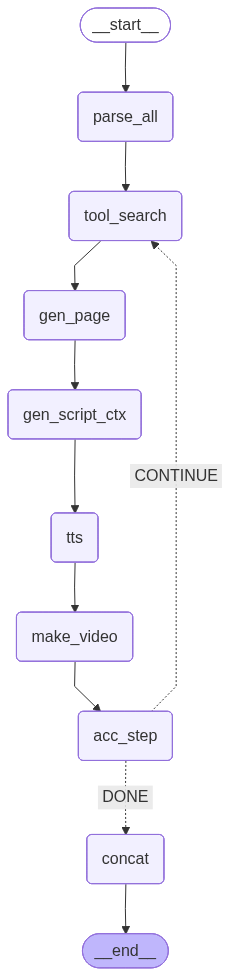

In [29]:
# 슬라이드 바인딩
def node_build_slides(state: State) -> State:
    """개별 리스트들을 slides 리스트로 통합"""
    idx = state['slide_index']

    # slides 리스트 초기화 (첫 슬라이드인 경우)
    if 'slides' not in state or not state['slides']:
        state['slides'] = []

    # 현재 슬라이드 정보 추가
    slide_data = {
        "index": idx,
        "title": state["titles"][idx] if idx < len(state["titles"]) else "",
        "text": state["texts"][idx] if idx < len(state["texts"]) else "",
        "slide_image": state["slide_image"][idx] if idx < len(state["slide_image"]) else "",
        # 수정: 리스트에서 가져오기
        "page_content": state["page_contents"][idx] if idx < len(state.get("page_contents", [])) else "",
        "script": state["scripts"][idx] if idx < len(state.get("scripts", [])) else "",
        "audio_path": ""  # tts 노드에서 채움
    }

    state["slides"].append(slide_data)

    return state


In [30]:
# 보고서 작성

import os
import textwrap
from docx import Document
from docx.shared import Inches, Pt
from docx.oxml.ns import qn

def summarize_report(state: dict) -> dict:
    """
    현재 슬라이드(script + images)를 Word 보고서에 추가하고,
    LLM으로 핵심 내용 + 관련 링크를 포함한 보고서 형식으로 다듬습니다.
    """
    slide_index = state.get("slide_index", 0)
    work_dir = state.get("work_dir", "./webio")
    current_script = state.get("script", "")

    # 현재 슬라이드 이미지 필터링 (끝 번호가 slide_index와 같은 것만)
    current_images = []
    for img in state.get("images", []):
        basename = os.path.basename(img)
        num_part = os.path.splitext(basename.split("_")[-1])[0]
        if num_part.isdigit() and int(num_part) == slide_index:
            current_images.append(img)

    # 워드 보고서 경로
    report_path = os.path.join(work_dir, "report.docx")

    # 기존 보고서 로드 또는 새로 생성
    if os.path.exists(report_path):
        doc = Document(report_path)
    else:
        doc = Document()

    # 기본 폰트 한글 설정
    style = doc.styles["Normal"]
    style.font.name = "맑은 고딕"
    style._element.rPr.rFonts.set(qn("w:eastAsia"), "맑은 고딕")
    style.font.size = Pt(11)

    # --- 슬라이드 제목 추가 ---
    doc.add_heading(f"슬라이드 {slide_index + 1}", level=2)

    # --- 이미지 추가 (리사이즈) ---
    if current_images:
        for img_path in current_images:
            try:
                doc.add_picture(img_path, width=Inches(4))  # 크기 줄임
            except Exception as e:
                doc.add_paragraph(f"[이미지 불러오기 실패: {img_path}]")
    else:
        doc.add_paragraph("[이미지 없음]")

    # --- LLM로 핵심 내용 + 관련 링크 다듬기 ---
    sys_prompt = textwrap.dedent("""
    당신은 AI 보고서 작성 전문가입니다.
    아래 슬라이드 스크립트를 기반으로 핵심 내용만 보고서 형식으로 작성하세요.
    필요시 관련 링크(URL)를 2~3개 포함합니다.
    작성 규칙:
    1. 발표체가 아닌 객관적 보고서 톤으로 작성
    2. 핵심 내용 중심으로 4~6문장 이내
    3. 서론/결론/불필요한 구분선/제목은 생략
    4. 보고서 내용과 관련 링크 포함 가능
    """)

    # 기존 보고서 텍스트 포함
    full_text = "\n".join([p.text for p in doc.paragraphs])
    user_prompt = f"""
    이전 보고서 내용:
    {full_text}

    이번 슬라이드 스크립트:
    {current_script}
    """

    # LLM 호출
    resp = CLIENT.chat.completions.create(
        model=LLM_MODEL,
        messages=[
            {"role": "system", "content": sys_prompt},
            {"role": "user", "content": user_prompt}
        ],
        temperature=0.5,
        max_tokens=1000
    )

    refined_text = resp.choices[0].message.content.strip()

    # --- 불필요한 형식 제거 ---
    unwanted_phrases = ["---", "##", "###", "보고서:", "서론", "결론", "요약", "내용 요약"]
    for phrase in unwanted_phrases:
        refined_text = refined_text.replace(phrase, "")

    # --- 정제된 내용 추가 ---
    doc.add_paragraph(refined_text)

    # 저장
    os.makedirs(work_dir, exist_ok=True)
    doc.save(report_path)
    state["report"] = report_path

    print(f"✅ 보고서 업데이트 완료: {report_path}")
    return state


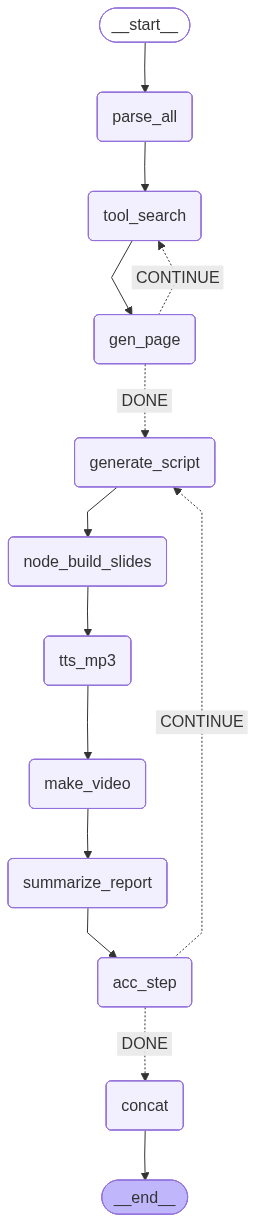

In [31]:
from langgraph.graph import StateGraph, END
builder = StateGraph(State)

#노드명 수정 및 추가
builder.add_node("parse_all", node_parse_ppt)
builder.add_node("tool_search",node_tool_search)
builder.add_node("gen_page", node_generate_page_content)

builder.add_node("generate_script", node_generate_script)
builder.add_node("node_build_slides", node_build_slides)
builder.add_node("tts_mp3", node_tts)
builder.add_node("make_video", node_make_video)
builder.add_node("summarize_report", summarize_report) # 추가

builder.add_node("acc_step", node_accumulate_and_step)
builder.add_node("concat", node_concat)

builder.set_entry_point("parse_all")
builder.add_edge("parse_all", "tool_search")
builder.add_edge("tool_search", "gen_page")

#추가
builder.add_conditional_edges(
    "gen_page",
    router_gen_or_done,
    {
        "CONTINUE": "tool_search",          # 반복
        "DONE": "generate_script",     # 다음 단계로 이동
    }
)

builder.add_edge("generate_script", "node_build_slides")
builder.add_edge("node_build_slides", "tts_mp3")
builder.add_edge("tts_mp3", "make_video")
builder.add_edge("make_video", "summarize_report")
builder.add_edge("summarize_report", "acc_step")


builder.add_conditional_edges(
    "acc_step",
    router_continue_or_done,
    {
        "CONTINUE": "generate_script",  # 스크립트 생성으로 이동
        "DONE": "concat"             # 종료 후 병합
    }
)

builder.set_finish_point("concat")

app = builder.compile()

app

## **4. 시스템 실행**

미션3,4에서 수행한 결과를 통합 테스트 해 봅시다.

### (1) 준비 작업
* 파일 업로드
* 사용자 프롬프트 준비

In [ ]:
# 파일 업로드


In [ ]:
# 사용자 프롬프트

# 출력 dir 만들기


### (2) Agent 실행
* State 초기화
* app 실행
    * 실행 시, 잘못된 반복 실행이 발생될 수 있으므로 다음 옵션 적용
        * `app.invoke(state, config={"recursion_limit": 100})`
        * 숫자 100은 조정 가능
* 동영상 play

In [ ]:
# 함수 없이 바로 초기화
state0: State = {
    'pptx_path': '',
    'work_dir': WORK_DIR,
    'prompt': USER_PROMPT,
    'slide_index': 0,
    'level': 0,
    'search_results': '',  # 수정: search_result → search_results
    'titles': [],
    'texts': [],
    'tables': [],
    'images': [],
    'slide_image': [],
    'total_slides': 0,
    'page_content': '',
    'page_contents': [],  # 수정: 추가
    'script': '',
    'scripts': [],        # 수정: 추가
    'audios': [],
    'video_paths': [],
    'final_video': '',
    'slides': [],
    'done': False,
    'report_path': ''
}


슬라이드 페이지 수: 4

추출 결과: 제목 4개, 텍스트 5개, 표 0개, 이미지 4개, 스냅샷 4개
[SerpAPI 검색] idx=0, title=['Git, Github란? ']
[완료] 모든 슬라이드 요약 완료 → 스크립트 생성 단계로 이동
--- 강의 스크립트 ---
안녕하세요, 여러분. 오늘은 소프트웨어 개발에서 필수적인 도구인 Git과 GitHub에 대해 이야기해보겠습니다. 여러분이 개발자로서 또는 프로젝트 관리자로서 협업을 원활하게 진행하기 위해서는 이 두 가지 도구를 이해하는 것이 매우 중요합니다.

우선 Git에 대해 설명드리겠습니다. Git은 버전 관리 시스템으로, 소스 코드의 변경 이력을 기록하고 관리하는 도구입니다. 이를 통해 여러 개발자가 동시에 작업하더라도 서로의 작업을 쉽게 통합할 수 있습니다. Git은 로컬에서 작업할 수 있는 장점이 있어, 인터넷 연결이 없더라도 버전 관리를 할 수 있습니다. 개발자가 실수로 잘못된 코드를 작성했을 때, 이전 버전으로 쉽게 돌아갈 수 있는 기능도 제공하죠.

이제 GitHub에 대해 알아보겠습니다. GitHub는 Git을 기반으로 한 웹 플랫폼으로, 코드 저장소를 호스팅하고 협업 기능을 제공합니다. 개발자들은 GitHub를 통해 자신의 프로젝트를 공유하고, 다른 개발자들과 협업할 수 있습니다. 또한, 오픈 소스 프로젝트에 기여하거나, 다양한 라이브러리와 도구들을 쉽게 찾을 수 있는 장점도 있습니다.

이제 Git과 GitHub의 기본 개념을 살펴보았으니, 다음 슬라이드에서는 이 두 도구를 활용한 실제 사례와 더불어, 여러분이 어떻게 효과적으로 사용할 수 있는지에 대해 구체적으로 알아보겠습니다. 함께 기대해 주세요!
스크립트 저장 완료: ./step1_output/script0.txt
Slide 1: alloy | 1.0x | 87.31초


/tmp/ipykernel_7935/692922538.py:59: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file(audio_path)


TypeError: expected str, bytes or os.PathLike object, not list

In [32]:
#질문 답변

def generate_response(state: State) -> State:
    # 여기에 코드를 완성합니다.
    texts = state.get("texts", [])
    tables = state.get("tables", [])
    images = state.get("images", [])
    slide_image = state.get("slide_image", []) # 슬라이드 스냅샷
    prompt_style = state.get("prompt", {})#.get("style", "핵심 요점 중심")
    page_content = state.get("page_content", [])
    question = state.get("question", "")

    # API 입력을 위한 콘텐츠 리스트 생성
    content = []

    # 1. 텍스트 추가
    content.append({"type": "text", "text": "슬라이드 텍스트: " + "\n".join(texts)})

    # 2. 표 추가 (첫 번째 표의 상위 6개 행만) [cite: 435]
    if tables:
        try:
            # 테이블 형식: List[List[List[str]]] [cite: 387]
            tbl_str = "\n".join("|".join(str(cell) for cell in row) for row in tables[0][:6])
            content.append({"type": "text", "text": "표 내용:\n" + tbl_str})
        except Exception as e:
            print(f"Error processing table: {e}")

    # 3. 이미지 추가 (슬라이드 스냅샷 + PPT 내 이미지, 최대 3개) [cite: 437, 438]
    all_image_paths = slide_image + images
    added_images = 0
    for img_path in all_image_paths:
        if added_images >= 3: #
            break
        try:
            data_url = img_to_data_url(img_path) #
            content.append({
                "type": "image_url",
                "image_url": {"url": data_url}
            })
            added_images += 1
        except Exception as e:
            print(f"Error adding image {img_path}: {e}")

    content.append({"type": "text", "text": f"[강의 요약본]\n{page_content}"})
    content.append({"type": "text", "text": f"[사용자 질문]\n{question}"})

    # 4. 시스템 프롬프트 정의
    sys_prompt = textwrap.dedent(f"""
    당신은 지식이 풍부하고 친절한 전문 강사입니다.
    사용자가 질문하면, 당신의 폭넓은 AI 지식을 총동원하여 답변을 생성합니다.

    - 주어진 슬라이드 정보(텍스트, 표, 이미지 요약)는 **답변의 핵심 주제**이므로 반드시 참고하되,
    - **정보가 부족하다면 당신의 지식으로 적극적으로 보충하고 살을 붙여서** 더 풍부하게 설명해야 합니다.
    - 답변은 2~3문장으로 간결하게 대답합니다.
    - 사용자가 요청한 강의 스타일({prompt_style})을 반영합니다.
    """)

    client = OpenAI()

    # 5. LLM 호출 [cite: 443-449]
    resp = client.chat.completions.create(
        model=LLM_MODEL, #
        messages=[
            {"role": "system", "content": sys_prompt},
            {"role": "user", "content": content}
        ],
        temperature=0.5,
        max_tokens=500
    )
    result_text = resp.choices[0].message.content.strip()

    print("llm 답변",result_text)

    # # 답변 오디오로 생성
    # resp = client.audio.speech.create(
    # model=TTS_MODEL,
    # voice=state.get("voice", "alloy"),
    # input=result )

    # #오디오 출력
    # display(Audio(resp.content))

    return {
        "state": state,
        "result": result_text
    }

In [ ]:
!pip install -U gradio

In [ ]:
!pip install --upgrade gradio fastapi uvicorn

In [ ]:
!pip install httpx==0.24.0

## **5. Web APP 개발(Gradio)**
* 화면 개발
    * 입력 : ppt파일, 프롬프트(강의 작성톤), voice 선택(alloy, ...)
    * 출력 : 동영상 play, 동영상 다운로드 버튼
* 기본 화면을 제공합니다. 필요한 기능을 직접 추가하세요.

In [36]:
import os
import time
import shutil
import gradio as gr

# -----------------------------
# 1️⃣ VOICE / TONE 매핑 정의
# -----------------------------
TONES_DISPLAY = [
    "Professional (전문적)",
    "Friendly (친근한)",
    "Serious (진지한)",
    "Calm (차분한)",
    "Energetic (활기찬)"
]

VOICES_DISPLAY = [
    "자동 (톤에 맞게)",
    "Alloy",
    "Echo",
    "Nova",
    "Onyx",
    "Fable",
    "Shimmer"
]

TONES_MAPPING = {
    "Professional (전문적)": "professional",
    "Friendly (친근한)": "friendly",
    "Serious (진지한)": "serious",
    "Calm (차분한)": "calm",
    "Energetic (활기찬)": "energetic"
}

VOICES_MAPPING = {
    "자동 (톤에 맞게)": None,
    "Alloy": "alloy",
    "Echo": "echo",
    "Nova": "nova",
    "Onyx": "onyx",
    "Fable": "fable",
    "Shimmer": "shimmer"
}

DIFFICULTIES = ["쉬움", "중간", "어려움"]
WORK_DIR = "./webio"

def run_pipeline(state: dict):
    """
    LangGraph 실행 예시
    """
    final_state = app.invoke(state)  # 실제 app 객체 필요
    video_path = final_state.get("final_video")
    report_path = final_state.get("report", final_state.get("report_path"))
    return video_path, report_path, final_state

def answer_question(question, current_state):
    """
    AI 강사 질문/답변 처리
    """
    if not question:
        return "질문을 입력해주세요.", current_state
    if not current_state:
        return "먼저 강의를 생성해야 합니다.", current_state

    current_state["question"] = question
    try:
        out = generate_response(current_state)  # 실제 구현 필요
        current_state = out["state"]
        ai_response = out["result"]
        return ai_response, current_state
    except Exception as e:
        return f"❌ 답변 생성 오류: {e}", current_state

# -----------------------------
# 3️⃣ 파이프라인 시작
# -----------------------------
def start_pipeline(pptx_file, tone_display, voice_display, speed, difficulty, state):
    if pptx_file is None:
        return "❌ PPT 파일을 업로드하세요.", None, None, None, gr.update(visible=False), state

    # 내부 값 변환
    tone = TONES_MAPPING[tone_display]
    voice = VOICES_MAPPING[voice_display] or select_voice_by_tone(tone)

    work_dir = os.path.join(WORK_DIR, f"run-{int(time.time())}")
    os.makedirs(work_dir, exist_ok=True)

    pptx_path = os.path.join(work_dir, "input.pptx")
    shutil.copy(pptx_file.name, pptx_path)

    # State 초기화
    state = {
        "pptx_path": pptx_path,
        "work_dir": work_dir,
        "prompt": {
            "tone": tone,
            "voice": voice,
            "speed": speed,
            "difficulty": difficulty
        },
        "slide_index": 0,
        "search_results": "",

        # 추출 산출물
        "titles": [],
        "texts": [],
        "tables": [],
        "images": [],
        "slide_image": [],
        "len": 0,

        "final_video": "",

        # 생성 산출물
        "page_content": [],
        "script": "",
        "slides": [],

        # 미디어 산출물
        "audios": [],
        "audio_info": {},
        "video_path": "",
        "video_paths": [],
        "question": question or "",
        "level": 0,
        "report": "",

        # 반복 처리용
        "total_slides": 0,
        "current_slide": 0,
        "done": False
    }

    try:
        video_path, report_path, final_state = run_pipeline(state)

        # 절대 경로
        report_path_abs = os.path.abspath(final_state.get("report", report_path))
        video_path_abs = os.path.abspath(video_path) if video_path else None

        if not os.path.exists(report_path_abs):
            return (
                "❌ 보고서 생성 실패",
                video_path_abs,
                video_path_abs,
                None,
                gr.update(visible=False),
                final_state
            )

        return (
            "✅ 강의 및 보고서 생성 완료!",
            video_path_abs,
            video_path_abs,
            report_path_abs,
            gr.update(visible=True),
            final_state
        )

    except Exception as e:
        return (
            f"❌ 오류 발생: {e}",
            None,
            None,
            None,
            gr.update(visible=False),
            state
        )

# -----------------------------
# 4️⃣ Gradio UI
# -----------------------------
with gr.Blocks(title="AI 강의 생성기") as demo:
    gr.Markdown("## 🎥 PPT → AI 강의 영상 + 보고서 생성기")

    state = gr.State()

    with gr.Row():
        inp_ppt = gr.File(label="PPTX 업로드", file_types=[".pptx"])
        with gr.Column():
            inp_tone = gr.Dropdown(choices=TONES_DISPLAY, value="Professional (전문적)", label="강의 톤")
            inp_voice = gr.Dropdown(choices=VOICES_DISPLAY, value="자동 (톤에 맞게)", label="TTS Voice")
            inp_speed = gr.Slider(minimum=0.5, maximum=2.0, value=1.0, step=0.1, label="재생 속도")
            inp_difficulty = gr.Dropdown(DIFFICULTIES, value="중간", label="설명 난이도")

    run_btn = gr.Button("🚀 강의 생성 시작")
    out_status = gr.Textbox(label="상태")
    out_video = gr.Video(label="영상 미리보기", interactive=False)
    out_download_video = gr.DownloadButton(label="🎬 영상 다운로드")
    out_download_report = gr.DownloadButton(label="📄 보고서 다운로드")

    # QA 영역
    with gr.Group(visible=False) as qa_group:
        gr.Markdown("### ❓ AI 강사에게 질문하기")
        inp_question_qa = gr.Textbox(label="질문 입력")
        ask_btn = gr.Button("질문 전송")
        out_answer = gr.Markdown(label="AI 답변")

    # --- 버튼 연결 ---
    run_btn.click(
        start_pipeline,
        inputs=[inp_ppt, inp_tone, inp_voice, inp_speed, inp_difficulty, state],
        outputs=[out_status, out_video, out_download_video, out_download_report, qa_group, state]
    )

    ask_btn.click(
        answer_question,
        inputs=[inp_question_qa, state],
        outputs=[out_answer, state]
    )

demo.launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://292f75d3954b56922c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1134, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://292f75d3954b56922c.gradio.live
